# 作業 : (Kaggle)鐵達尼生存預測精簡版 
https://www.kaggle.com/c/titanic

# 作業1
* 下列A~E五個程式區塊中，哪一塊是特徵工程?
> <b>C</b>
>
> 從事實到對應分數的轉換，我們稱為特徵⼯程

# 作業2
* 對照程式區塊 B 與 C 的結果，請問那些欄位屬於"類別型欄位"? (回答欄位英文名稱即可) 
> <b>Pclass, Sex, Cabin, Embarked</b>

> (LabelEncoder) Name, Sex, Ticket, Cabin, Embarked <br>
> (LabelEncoder+value_counts()) Pclass, Name, Sex, Ticket, Cabin, Embarked <br>

# 作業3
* 續上題，請問哪個欄位是"目標值"?
> Survived

In [31]:
# 程式區塊 A
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data_path = '../data/titanic/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')
df_train.shape

(891, 12)

In [32]:
# 程式區塊 B
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        print(c)


Name
Sex
Ticket
Cabin
Embarked


In [34]:
# 程式區塊 C
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

C:\AI_course\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\AI_course\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\AI_course\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\AI_course\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\AI_course\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Min

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.118683,1.0,0.283951,0.125,0.0,0.775862,0.016072,0.000000,1.000000
1,0.0,0.218989,0.0,0.481481,0.125,0.0,0.879310,0.140813,0.575269,0.333333
2,1.0,0.400459,0.0,0.333333,0.000,0.0,0.984914,0.017387,0.000000,1.000000
3,0.0,0.323124,0.0,0.444444,0.125,0.0,0.070043,0.105390,0.381720,1.000000
4,1.0,0.016845,1.0,0.444444,0.000,0.0,0.699353,0.017630,0.000000,1.000000


In [35]:
# 程式區塊 D
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

C:\AI_course\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# 程式區塊 E
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.to_csv('titanic_baseline.csv', index=False) 

--- ---

[Sex] : 2


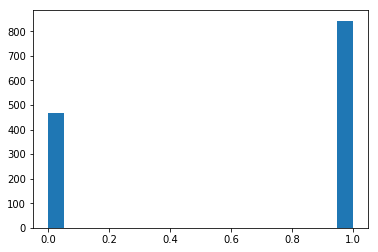

[Pclass] : 3


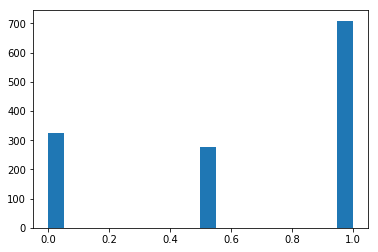

[Embarked] : 4


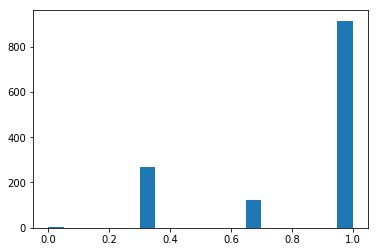

[SibSp] : 7


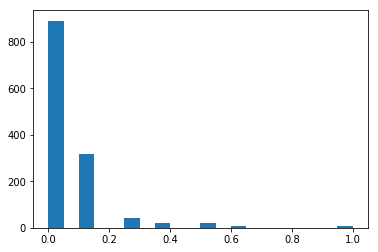

[Parch] : 8


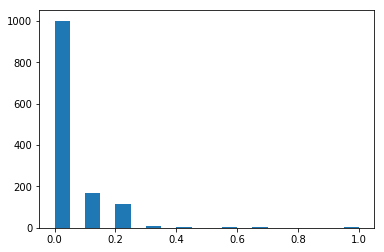

[Age] : 99


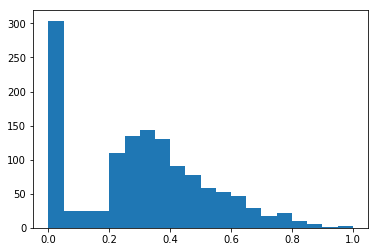

[Cabin] : 187


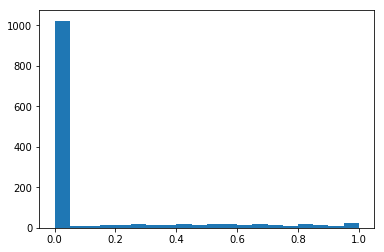

[Fare] : 282


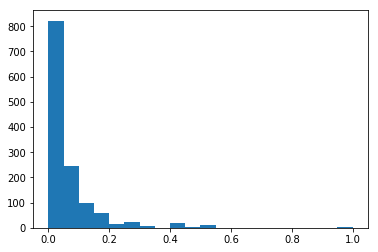

[Ticket] : 929


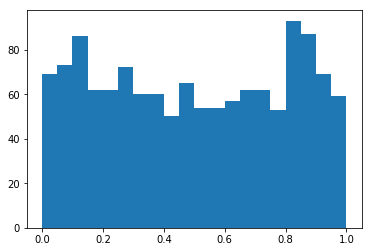

[Name] : 1307


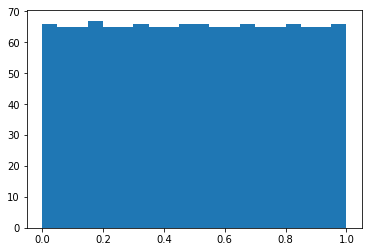

In [38]:
import matplotlib.pyplot as plt

sub_df = df.copy()

key_cnts = {}
for col in sub_df.columns:
    key_cnts[col] = sub_df[col].value_counts().size

for col in sorted(key_cnts, key=key_cnts.get, reverse=False):
    print(f"[{col}] : {key_cnts[col]}")
    plt.hist(sub_df[col], bins=20)
    plt.show()


[欄位說明](https://ithelp.ithome.com.tw/articles/10200327)

以下為各欄位的名稱及代表意義：
<table  align="left">
<thead>
<tr>
<th>欄位名稱</th>
<th align="center">定義</th>
</tr>
</thead>
<tbody>
<tr>
<td>survival</td>
<td align="center">存歿</td>
</tr>
<tr>
<td>pclass</td>
<td align="center">購票分級</td>
</tr>
<tr>
<td>sex</td>
<td align="center">性別</td>
</tr>
<tr>
<td>Age</td>
<td align="center">年紀</td>
</tr>
<tr>
<td>sibsp</td>
<td align="center">鐵達尼號上的兄弟姊妹/配偶數量</td>
</tr>
<tr>
<td>parch</td>
<td align="center">鐵達尼號上的雙親/子女數量</td>
</tr>
<tr>
<td>ticket</td>
<td align="center">票根號碼</td>
</tr>
<tr>
<td>fare</td>
<td align="center">票價</td>
</tr>
<tr>
<td>cabin</td>
<td align="center">船艙編號</td>
</tr>
<tr>
<td>embarked</td>
<td align="center">登船港口</td>
</tr>
</tbody>
</table>